In [1]:
#include <cstdint>
#include <string>
#include <vector>
#include <xtl/xbase64.hpp>

#include <opencv2/core/core.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <opencv2/imgproc/imgproc.hpp>
#pragma cling load("opencv_core")
#pragma cling load("opencv_highgui")
#pragma cling load("opencv_imgproc")

In [2]:
cv::Mat Lena = cv::imread("/home/tpanzarella/.im/lena.jpg", CV_LOAD_IMAGE_COLOR);

In [3]:
void show_image(const cv::Mat& im)
{
    std::vector<int> params = {cv::IMWRITE_JPEG_QUALITY, 80};
    std::vector<std::uint8_t> buff;
    cv::imencode(".jpg", im, buff, params);

    xeus::xjson mime;
    mime["image/jpeg"] = xtl::base64encode(std::string(buff.begin(), buff.end()));
    
    xeus::get_interpreter().display_data(std::move(mime), 
                                         xeus::xjson::object(),
                                         xeus::xjson::object());
}

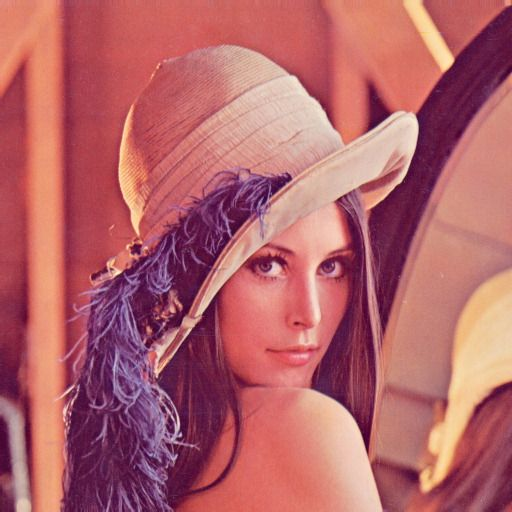

In [4]:
show_image(Lena);

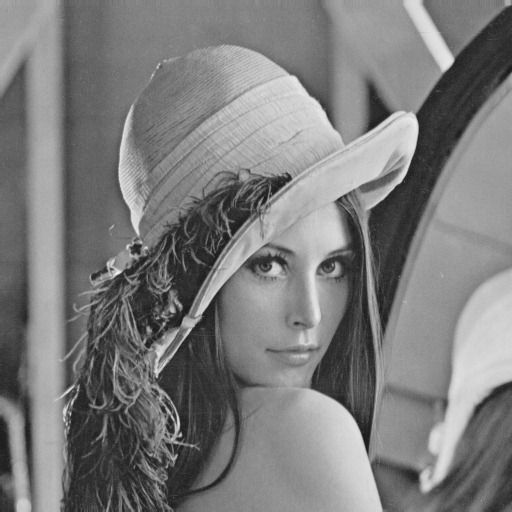

In [5]:
cv::Mat Lena_gray;
cv::cvtColor(Lena, Lena_gray, CV_BGR2GRAY);
show_image(Lena_gray);